## Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

## EDA

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        uid  game_pk  year        date  team_id_b  team_id_p  inning  top  \
0  14143226   286874  2011  2011-03-31        108        118       1    1   
1  14143227   286874  2011  2011-03-31        108        118       1    1   
2  14143228   286874  2011  2011-03-31        108        118       1    1   
3  14143229   286874  2011  2011-03-31        108        118       1    1   
4  14143230   286874  2011  2011-03-31        108        118       1    1   

   at_bat_num  pcount_at_bat  ...  spin_dir  spin_rate   cc  on_1b  on_2b  \
0           1              1  ...       NaN        NaN  NaN    NaN    NaN   
1           1              2  ...       NaN        NaN  NaN    NaN    NaN   
2           1              3  ...       NaN        NaN  NaN    NaN    NaN   
3           1              4  ...       NaN        NaN  NaN    NaN    NaN   
4           2              1  ...       NaN        NaN  NaN    NaN    NaN   

   on_3b           created_at             added_at          modified_at  \

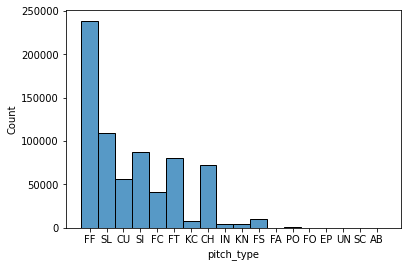

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


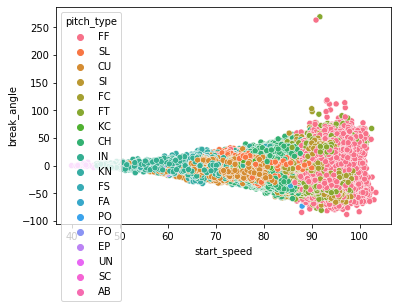

In [54]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('pitches', sep=',')
# Select columns that contain the word "runner"
runner_cols = df.columns[df.columns.str.contains('runner')]

# Drop the runner columns
df = df.drop(runner_cols, axis=1)


print(df.head())

# Check the shape of the dataframe
print(df.shape)

# Check the data types of the columns
print(df.dtypes)

# Check for missing values
print(df.isna().sum())

# Check summary statistics for numerical columns
print(df.describe())
# drop rows with missing values in the 'pitch_type' column
df
df = df.dropna(subset=['pitch_type'])

# Plot a histogram of pitch types
sns.histplot(df['pitch_type'])
plt.show()

# Plot a scatterplot of pitch speed and break angle
sns.scatterplot(x='start_speed', y='break_angle', hue='pitch_type', data=df)
plt.show()

# Plot a correlation matrix
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.show()


## Plots to see the distribution of the pitch types

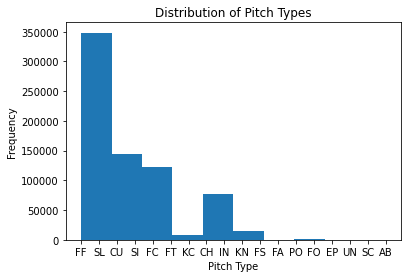

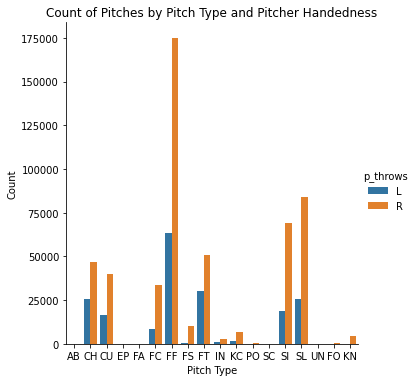

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


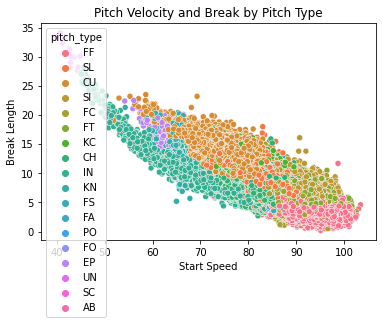

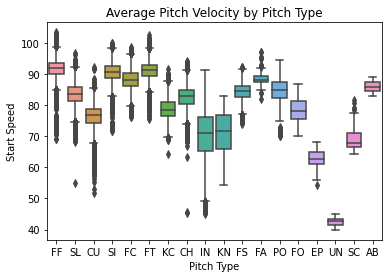

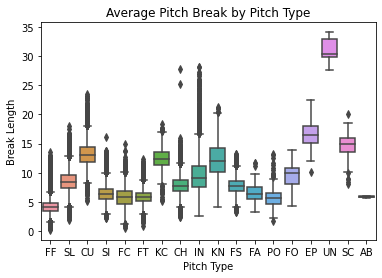

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


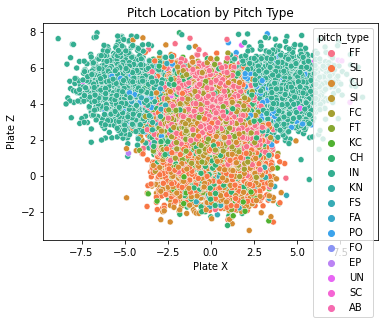

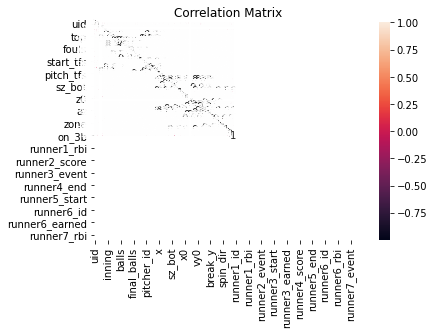

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


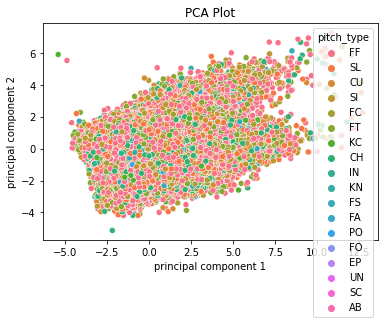

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of pitch types
plt.hist(df["pitch_type"])
plt.title("Distribution of Pitch Types")
plt.xlabel("Pitch Type")
plt.ylabel("Frequency")
plt.show()


# Group by pitcher handedness and pitch type and count the number of pitches
pitch_count = df.groupby(["p_throws", "pitch_type"])["pitch_type"].count().reset_index(name="count")

# Plot using a bar plot
sns.catplot(x="pitch_type", y="count", hue="p_throws", data=pitch_count, kind="bar")
plt.title("Count of Pitches by Pitch Type and Pitcher Handedness")
plt.xlabel("Pitch Type")
plt.ylabel("Count")
plt.show()

# Scatterplot of pitch velocity and break by pitch type
sns.scatterplot(x="start_speed", y="break_length", hue="pitch_type", data=df)
plt.title("Pitch Velocity and Break by Pitch Type")
plt.xlabel("Start Speed")
plt.ylabel("Break Length")
plt.show()

# Average pitch velocity by pitch type
sns.boxplot(x="pitch_type", y="start_speed", data=df)
plt.title("Average Pitch Velocity by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Start Speed")
plt.show()

# Average pitch break by pitch type
sns.boxplot(x="pitch_type", y="break_length", data=df)
plt.title("Average Pitch Break by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Break Length")
plt.show()

# Scatterplot of pitch location by pitch type
sns.scatterplot(x="px", y="pz", hue="pitch_type", data=df)
plt.title("Pitch Location by Pitch Type")
plt.xlabel("Plate X")
plt.ylabel("Plate Z")
plt.show()

# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract relevant features and standardize data
features = ["start_speed", "end_speed", "spin_rate", "spin_dir", "break_angle", "break_length", "px", "pz"]
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA and plot results
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principal_df, df[['pitch_type']]], axis = 1)
sns.scatterplot(x="principal component 1", y="principal component 2", hue="pitch_type", data=final_df)
plt.title("PCA Plot")
plt.show()


## pitch count by pitch type and inning

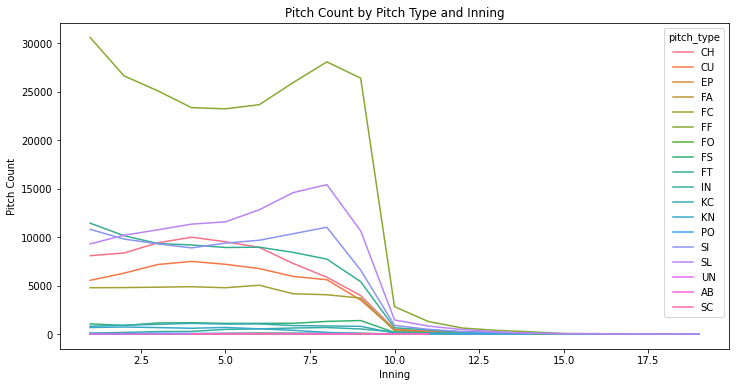

In [22]:
import matplotlib.pyplot as plt

# Group the data by inning and pitch type and count the number of pitches
pitch_count = df.groupby(['inning', 'pitch_type']).size().reset_index(name='count')

# Plot the pitch counts by pitch type and inning
plt.figure(figsize=(12,6))
sns.lineplot(x='inning', y='count', hue='pitch_type', data=pitch_count)
plt.title('Pitch Count by Pitch Type and Inning')
plt.xlabel('Inning')
plt.ylabel('Pitch Count')
plt.show()

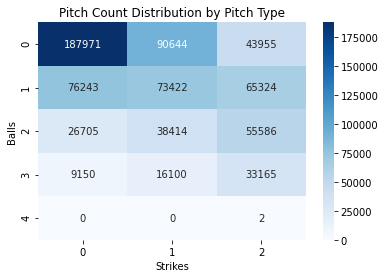

In [23]:
import pandas as pd
import seaborn as sns

# Create a pivot table of pitch type counts by pitch count
pivot_table = pd.pivot_table(df, values='pitch_type', index='balls', columns='strikes', aggfunc=len, fill_value=0)

# Create a heatmap to visualize the counts
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')
plt.title('Pitch Count Distribution by Pitch Type')
plt.xlabel('Strikes')
plt.ylabel('Balls')
plt.show()

## Pitch count at the at bat and pitch type

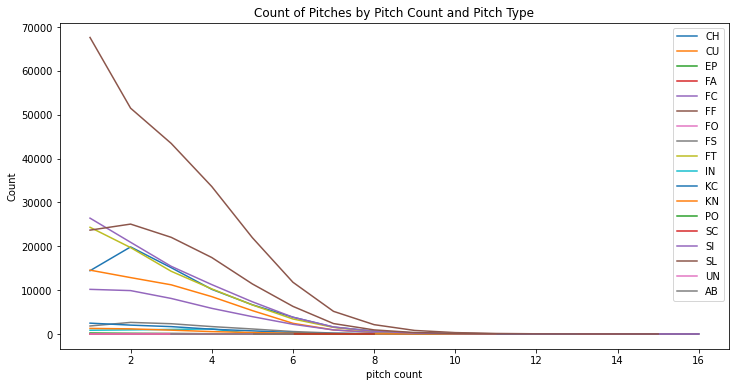

In [29]:
import matplotlib.pyplot as plt

# Group data by pitch count and pitch type
pitch_count_by_type = df.groupby(['pcount_at_bat', 'pitch_type']).size().reset_index(name='count')

# Plot the data
fig, ax = plt.subplots(figsize=(12,6))
for pitch_type in pitch_count_by_type['pitch_type'].unique():
    data = pitch_count_by_type[pitch_count_by_type['pitch_type'] == pitch_type]
    ax.plot(data['pcount_at_bat'], data['count'], label=pitch_type)
    
ax.legend()
ax.set_xlabel('pitch count')
ax.set_ylabel('Count')
ax.set_title('Count of Pitches by Pitch Count and Pitch Type')
plt.show()

## Pitch count of pitcher full game

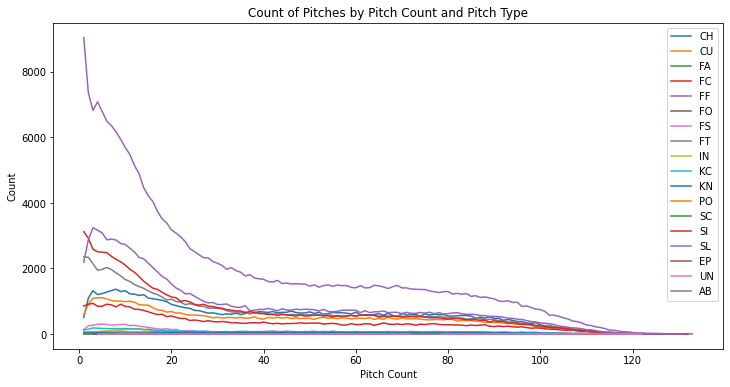

In [27]:
import matplotlib.pyplot as plt

# Group data by pitch count and pitch type
pitch_count_by_type = df.groupby(['pcount_pitcher', 'pitch_type']).size().reset_index(name='count')

# Plot the data
fig, ax = plt.subplots(figsize=(12,6))
for pitch_type in pitch_count_by_type['pitch_type'].unique():
    data = pitch_count_by_type[pitch_count_by_type['pitch_type'] == pitch_type]
    ax.plot(data['pcount_pitcher'], data['count'], label=pitch_type)
    
ax.legend()
ax.set_xlabel('Pitch Count')
ax.set_ylabel('Count')
ax.set_title('Count of Pitches by Pitch Count and Pitch Type')
plt.show()

## Count of Pitches by Pitch Type and inning

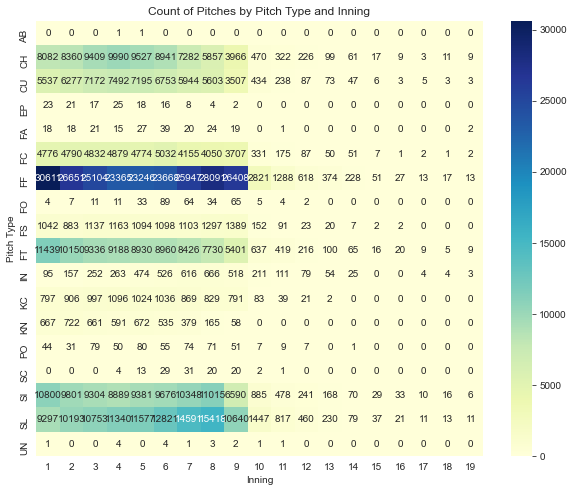

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Group by pitch type and inning
pitch_type_count = df.groupby(['pitch_type', 'inning'])['pcount_pitcher'].count().reset_index()

# Pivot the data to create a heatmap
pitch_type_count_pivot = pitch_type_count.pivot(index='pitch_type', columns='inning', values='pcount_pitcher').fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pitch_type_count_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Count of Pitches by Pitch Type and Inning')
plt.xlabel('Inning')
plt.ylabel('Pitch Type')
plt.show()


## Actually count of batter and pitch type

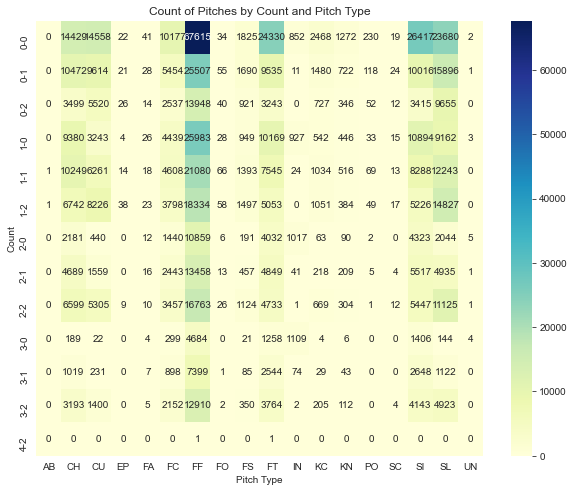

In [34]:

# Group by count and pitch type
count_pitch_type = df.groupby(['balls', 'strikes', 'pitch_type'])['pitch_type'].count()

# Reshape the data into a pivot table
count_pitch_type = count_pitch_type.reset_index(name='count')
count_pitch_type = count_pitch_type.pivot_table(index=['balls', 'strikes'], columns='pitch_type', values='count').fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(count_pitch_type, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Count of Pitches by Count and Pitch Type')
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.show()

## Proportion of pitches by lefty and righty

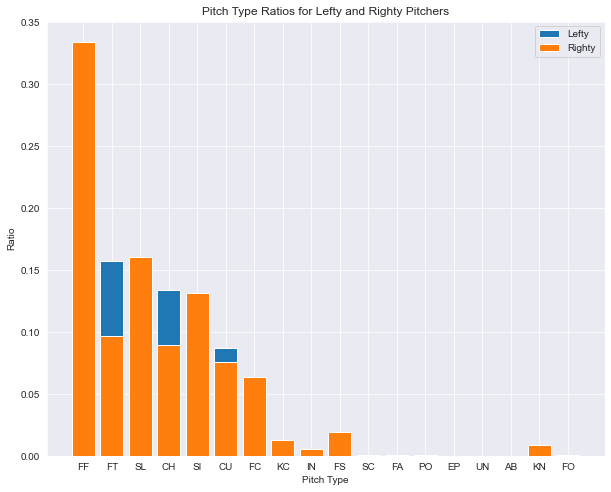

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv('pitches.csv')

# Filter data for lefty and righty pitchers
lefty_df = df[df['p_throws'] == 'L']
righty_df = df[df['p_throws'] == 'R']

# Get counts of each pitch type for lefty and righty pitchers
lefty_pitch_counts = lefty_df['pitch_type'].value_counts()
righty_pitch_counts = righty_df['pitch_type'].value_counts()

# Calculate ratios of pitch types for lefty and righty pitchers
lefty_pitch_ratios = lefty_pitch_counts / lefty_pitch_counts.sum()
righty_pitch_ratios = righty_pitch_counts / righty_pitch_counts.sum()

# Create bar chart of pitch ratios for lefty and righty pitchers
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(lefty_pitch_ratios.index, lefty_pitch_ratios.values, label='Lefty')
ax.bar(righty_pitch_ratios.index, righty_pitch_ratios.values, label='Righty')
ax.legend()
plt.title('Pitch Type Ratios for Lefty and Righty Pitchers')
plt.xlabel('Pitch Type')
plt.ylabel('Ratio')
plt.show()

In [43]:
lefty_pitch_ratios

FF    0.329331
FT    0.156903
SL    0.134269
CH    0.133973
SI    0.097887
CU    0.086861
FC    0.042784
KC    0.009498
IN    0.005851
FS    0.001704
SC    0.000348
FA    0.000291
PO    0.000140
EP    0.000130
UN    0.000021
AB    0.000010
Name: pitch_type, dtype: float64

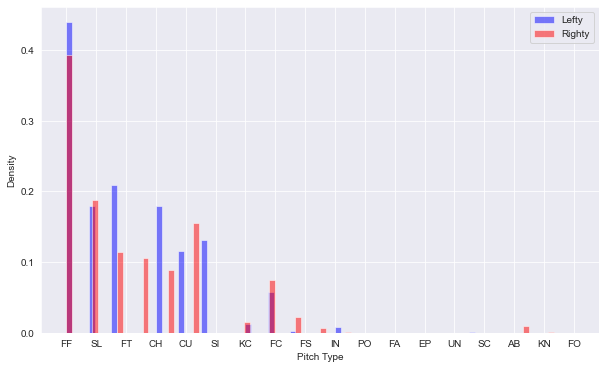

In [46]:
import matplotlib.pyplot as plt

# Create separate data frames for lefty and righty pitchers
lefty_df = df[df['p_throws'] == 'L']
righty_df = df[df['p_throws'] == 'R']

# Set up figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create lefty histogram
ax.hist(lefty_df['pitch_type'], bins=20, alpha=0.5, color='blue', label='Lefty', density=True, width=0.4)

# Create righty histogram
ax.hist(righty_df['pitch_type'], bins=20, alpha=0.5, color='red', label='Righty', density=True, width=0.4)

# Set axis labels and legend
ax.set_xlabel('Pitch Type')
ax.set_ylabel('Density')
ax.legend()

# Show the plot
plt.show()


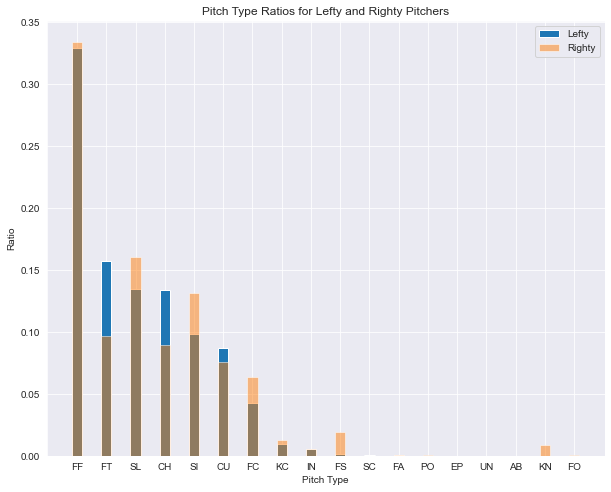

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv('pitches.csv')

# Filter data for lefty and righty pitchers
lefty_df = df[df['p_throws'] == 'L']
righty_df = df[df['p_throws'] == 'R']

# Get counts of each pitch type for lefty and righty pitchers
lefty_pitch_counts = lefty_df['pitch_type'].value_counts()
righty_pitch_counts = righty_df['pitch_type'].value_counts()

# Calculate ratios of pitch types for lefty and righty pitchers
lefty_pitch_ratios = lefty_pitch_counts / lefty_pitch_counts.sum()
righty_pitch_ratios = righty_pitch_counts / righty_pitch_counts.sum()

# Create bar chart of pitch ratios for lefty and righty pitchers
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
ax.bar(lefty_pitch_ratios.index, lefty_pitch_ratios.values, bar_width, label='Lefty')
ax.bar(righty_pitch_ratios.index, righty_pitch_ratios.values, bar_width, alpha=0.5, label='Righty')
ax.legend()
plt.title('Pitch Type Ratios for Lefty and Righty Pitchers')
plt.xlabel('Pitch Type')
plt.ylabel('Ratio')
plt.show()


## Plots to see the difference in ratio of pitches thrown based on Handedness matchup with Pitchers AND Batters

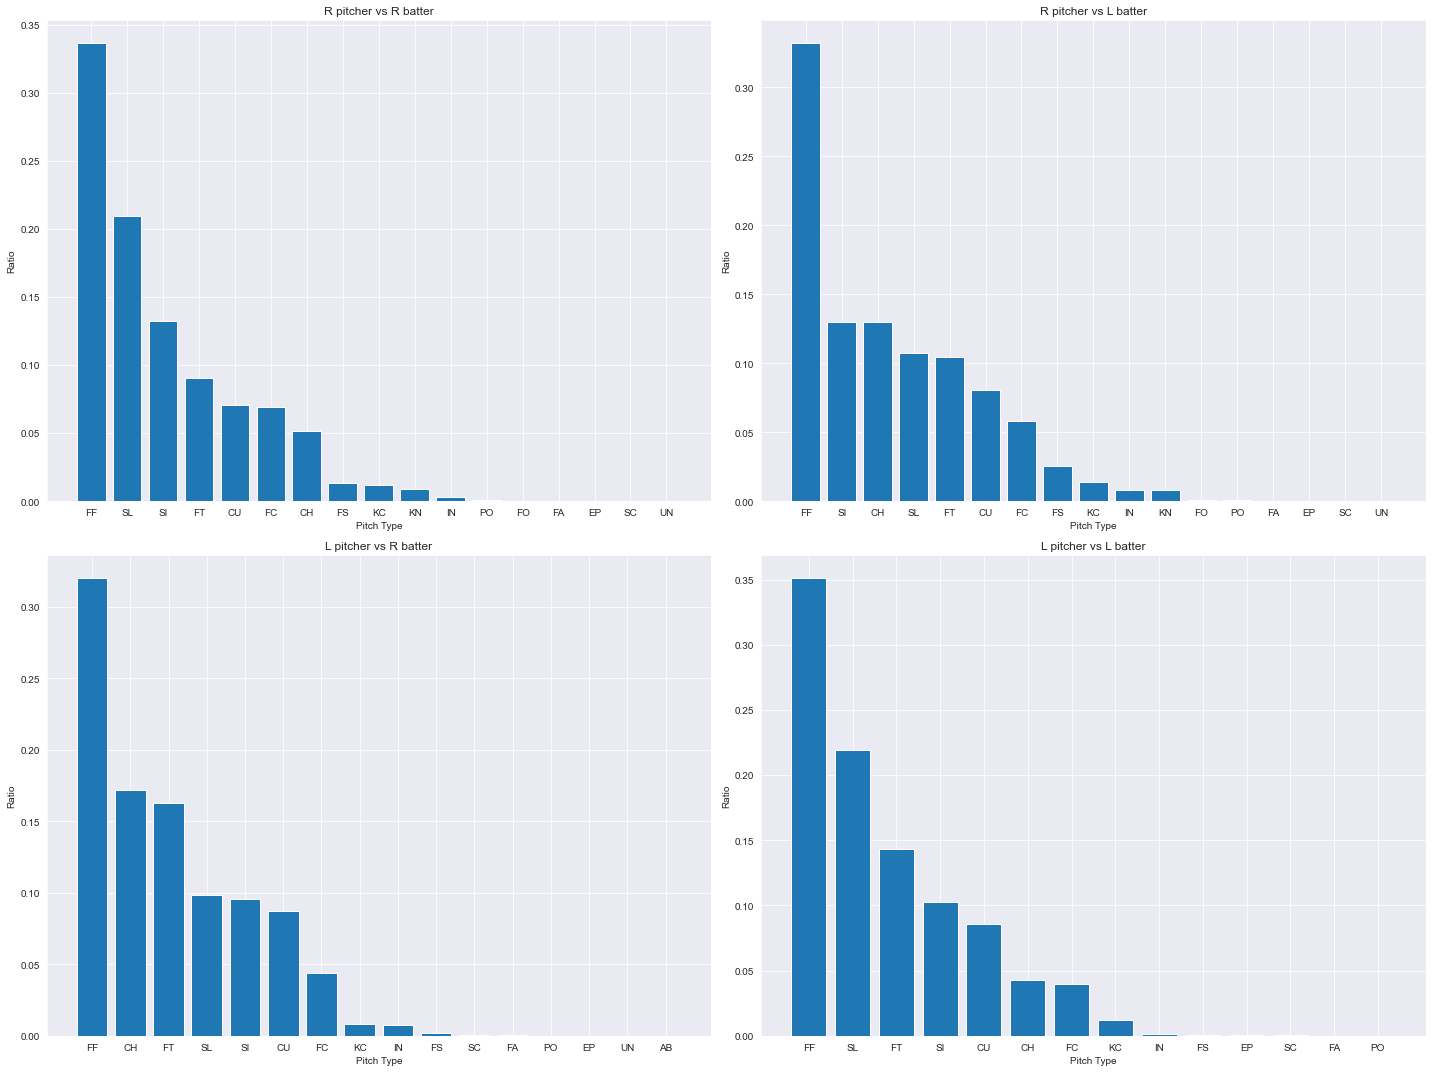

In [69]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a list of unique pitcher handedness values
pitcher_hands = df['p_throws'].unique()

# Create a list of unique batter stance values
batter_stances = df['stand'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(len(pitcher_hands), len(batter_stances), figsize=(20, 15))

# Loop over each possible pitcher/batter matchup and create a bar chart of the pitch type ratios
for i, pitcher_hand in enumerate(pitcher_hands):
    for j, batter_stance in enumerate(batter_stances):
        # Filter data for current pitcher/batter matchup
        matchup_df = df[(df['p_throws'] == pitcher_hand) & (df['stand'] == batter_stance)]
        
        # Get counts of each pitch type for the matchup
        pitch_counts = matchup_df['pitch_type'].value_counts()
        
        # Calculate ratios of pitch types for the matchup
        pitch_ratios = pitch_counts / pitch_counts.sum()
        
        # Create bar chart of pitch ratios for the matchup
        ax = axes[i, j]
        ax.bar(pitch_ratios.index, pitch_ratios.values)
        ax.set_title(f'{pitcher_hand} pitcher vs {batter_stance} batter')
        ax.set_xlabel('Pitch Type')
        ax.set_ylabel('Ratio')

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()



# Functions for feature engineering

In [4]:
#Re-read data
df = pd.read_csv('pitches', sep=',')
# Select columns that contain the word "runner"
runner_cols = df.columns[df.columns.str.contains('runner')]

# Drop the runner columns
df = df.drop(runner_cols, axis=1)

C:\Users\Eric\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Last 3 pitches velocity and type

In [5]:
def last_3_vel_type(df):
    
    # Create lagged columns for relevant features
    lags = range(1, 4)  # use data from the previous 3 pitches
    for col in ['start_speed', 'pitch_type']:
        for lag in lags:
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    return df


## Favorable/unfavorable counts

In [6]:
def count(df):
    
    # Create a new column for the pitcher count
    df['pitcher_count'] = df['balls'].astype(str) + '-' + df['strikes'].astype(str)

    # Map the favorable and unfavorable counts to 1, neutral counts to 0
    df['pitcher_count'] = df['pitcher_count'].map({
        '0-2': 1,
        '1-2': 1,
        '2-0': -1,
        '2-1': -1,
        '3-0': -1,
        '3-1': -1
    }).fillna(0)

    # Perform one-hot encoding on the pitcher count column
    df = pd.get_dummies(df, columns=['pitcher_count'], prefix='pc')
    return df



## Score differential of pitchers team - batting team

In [7]:
def score(df):
    
    # Create a new column for run differential
    df['run_diff'] = df.apply(lambda row: row['home_team_runs'] - row['away_team_runs'] if row['top'] == 'Bottom' else row['away_team_runs'] - row['home_team_runs'], axis=1)

    return df

## Baserunners yes or no

In [8]:
# Baserunners
def baserunners(df):
    
    # Replace NaN with 0
    df[['on_1b', 'on_2b', 'on_3b']] = df[['on_1b', 'on_2b', 'on_3b']].fillna(0)

    # Map non-zero values to 1
    df[['on_1b', 'on_2b', 'on_3b']] = df[['on_1b', 'on_2b', 'on_3b']].applymap(lambda x: 1 if x != 0 else 0)
    return df


## OHE pitch_type Two groups: offspeed and fastball

In [9]:
def OHE_two_type(df):
    
    # Create a new column for pitch groups
    df_pitches_two_groups = df.copy()
    df_pitches_two_groups['pitch_group'] = np.where(df_pitches_two_groups['pitch_type'].isin(['FF', 'FA', 'FC', 'FT', 'SI']), 'Fastball', 'Non-Fastball')

    # One-hot encode the pitch groups
    df_pitches_ohe = pd.get_dummies(df_pitches_two_groups['pitch_group'])

    # Add the one-hot encoded columns to the original dataframe
    df_pitches = pd.concat([df_pitches_two_groups, df_pitches_ohe], axis=1)
    return df_pitches

## Two type for the lag

In [10]:
def OHE_two_type_lag(df):
    
    # Create a new column for pitch groups for the three lag columns
    df_lags_two_groups = df.copy()
    df_lags_two_groups['pitch_group_lag1'] = np.where(df_lags_two_groups['pitch_type_lag1'].isin(['FF', 'FA', 'FC', 'FT', 'SI']), 'Fastball', 'Non-Fastball')
    df_lags_two_groups['pitch_group_lag2'] = np.where(df_lags_two_groups['pitch_type_lag2'].isin(['FF', 'FA', 'FC', 'FT', 'SI']), 'Fastball', 'Non-Fastball')
    df_lags_two_groups['pitch_group_lag3'] = np.where(df_lags_two_groups['pitch_type_lag3'].isin(['FF', 'FA', 'FC', 'FT', 'SI']), 'Fastball', 'Non-Fastball')

    # One-hot encode the pitch groups for the three lag columns
    df_lags_ohe = pd.get_dummies(df_lags_two_groups[['pitch_group_lag1', 'pitch_group_lag2', 'pitch_group_lag3']])

    # Add the one-hot encoded columns to the original dataframe
    df_pitches_lags = pd.concat([df_lags_two_groups, df_lags_ohe], axis=1)
    df_pitches_lags.head()
    df_pitches_lags = df_pitches_lags.drop(['pitch_type', 'pitch_type_lag1', 'pitch_type_lag2', 'pitch_type_lag3',"pitch_group_lag3",'pitch_group_lag2','pitch_group_lag1','pitch_group'], axis=1)

    # Show updated dataframe
    return df_pitches_lags

## Batter height to inches

In [11]:
def height_to_inches(height_str):
    feet, inches = height_str.split('-')
    return int(feet) * 12 + int(inches)

# apply function to b_height column
# df_pitches_lags['b_height_inches'] = df_pitches_lags['b_height'].apply(height_to_inches)
# df_pitches_lags['b_height_inches'] = df_pitches_lags['b_height'].apply(height_to_inches)
# df_pitches_lags.head()

## DF for each batter handedness

In [13]:
df_stand_r = df_pitches_lags.loc[df_pitches_lags['stand'] == 'R']
df_stand_l = df_pitches_lags.loc[df_pitches_lags['stand'] == 'L']
df_pitches_lags['stand'] = df_pitches_lags['stand'].replace({'L': 0, 'R': 1})

NameError: name 'df_pitches_lags' is not defined

## Correlation to fastball based on handedness of batter

In [199]:
df_pitches_lags.dropna().corr()['Fastball']

inning                          -0.016610
top                              0.003697
at_bat_num                      -0.017434
pcount_at_bat                   -0.041314
pcount_pitcher                  -0.069616
balls                            0.056302
strikes                         -0.131300
fouls                           -0.064145
outs                            -0.040278
is_final_pitch                  -0.011191
stand                           -0.001055
on_1b                            0.006518
on_2b                           -0.041480
on_3b                           -0.028146
start_speed_lag1                 0.075636
start_speed_lag2                 0.062465
start_speed_lag3                 0.068659
pc_-1.0                          0.110033
pc_0.0                           0.004981
pc_1.0                          -0.106684
run_diff                         0.003622
Fastball                         1.000000
Non-Fastball                    -1.000000
pitch_group_lag1_Fastball        0

In [189]:
df_stand_r.dropna().corr()['Fastball']

inning                          -0.014452
top                              0.005091
at_bat_num                      -0.015354
pcount_at_bat                   -0.041642
pcount_pitcher                  -0.068211
balls                            0.053876
strikes                         -0.128174
fouls                           -0.063491
outs                            -0.039729
is_final_pitch                  -0.009379
on_1b                            0.002036
on_2b                           -0.040200
on_3b                           -0.026549
start_speed_lag1                 0.072883
start_speed_lag2                 0.057773
start_speed_lag3                 0.064829
pc_-1.0                          0.105263
pc_0.0                           0.011795
pc_1.0                          -0.108871
run_diff                         0.001594
Fastball                         1.000000
Non-Fastball                    -1.000000
pitch_group_lag1_Fastball        0.076835
pitch_group_lag1_Non-Fastball   -0

In [190]:
df_stand_l.dropna().corr()['Fastball']

inning                          -0.019394
top                              0.001872
at_bat_num                      -0.020111
pcount_at_bat                   -0.040920
pcount_pitcher                  -0.071422
balls                            0.059424
strikes                         -0.135393
fouls                           -0.065010
outs                            -0.040978
is_final_pitch                  -0.013567
on_1b                            0.012455
on_2b                           -0.043164
on_3b                           -0.030272
start_speed_lag1                 0.079214
start_speed_lag2                 0.068586
start_speed_lag3                 0.073670
pc_-1.0                          0.116130
pc_0.0                          -0.003925
pc_1.0                          -0.103767
run_diff                         0.006301
Fastball                         1.000000
Non-Fastball                    -1.000000
pitch_group_lag1_Fastball        0.075899
pitch_group_lag1_Non-Fastball   -0

In [203]:
df_stand_r.dropna().corr()['Fastball']

inning                          -0.014452
top                              0.005091
at_bat_num                      -0.015354
pcount_at_bat                   -0.041642
pcount_pitcher                  -0.068211
balls                            0.053876
strikes                         -0.128174
fouls                           -0.063491
outs                            -0.039729
is_final_pitch                  -0.009379
on_1b                            0.002036
on_2b                           -0.040200
on_3b                           -0.026549
start_speed_lag1                 0.072883
start_speed_lag2                 0.057773
start_speed_lag3                 0.064829
pc_-1.0                          0.105263
pc_0.0                           0.011795
pc_1.0                          -0.108871
run_diff                         0.001594
Fastball                         1.000000
Non-Fastball                    -1.000000
pitch_group_lag1_Fastball        0.076835
pitch_group_lag1_Non-Fastball   -0

## Full correlation heatmap

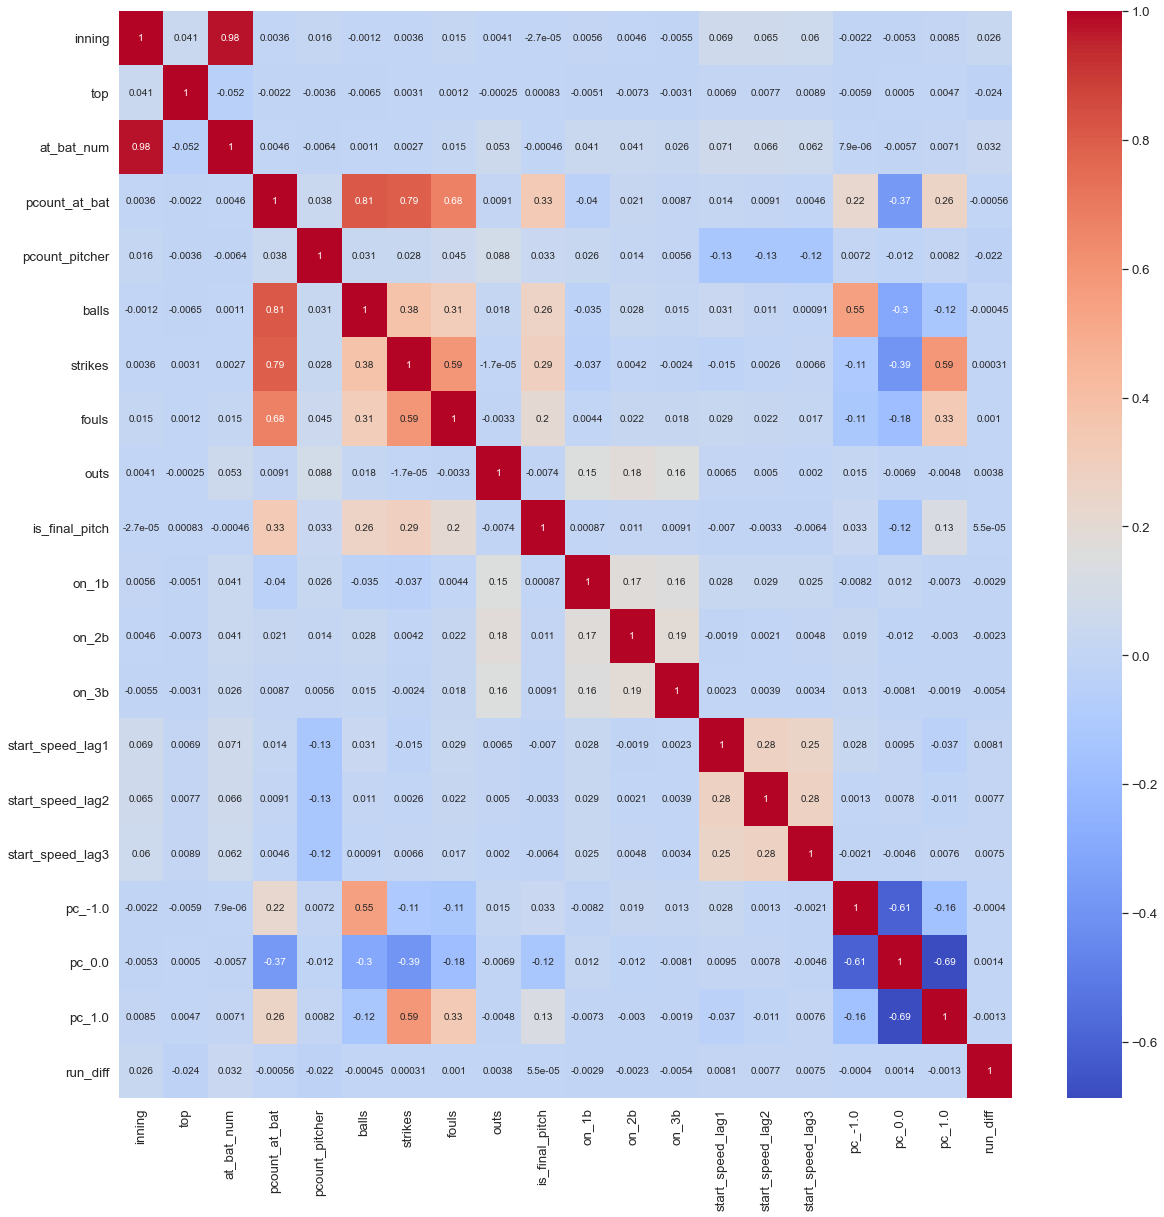

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr = df_stand_r.corr()

plt.figure(figsize=(20,20)) # Increase the figure size
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 10})
plt.show()


## Final function to feature transform and aggregate features into one DF

In [ ]:
df = pd.read_csv('pitches', sep=',')
# Select columns that contain the word "runner"
runner_cols = df.columns[df.columns.str.contains('runner')]

# Drop the runner columns
df = df.drop(runner_cols, axis=1)

In [14]:
df_final.head()

,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,outs,is_final_pitch,stand,on_1b,on_2b,...,pc_0.0,pc_1.0,run_diff,Fastball,pitch_group_lag1_Fastball,pitch_group_lag1_Non-Fastball,pitch_group_lag2_Fastball,pitch_group_lag2_Non-Fastball,pitch_group_lag3_Fastball,pitch_group_lag3_Non-Fastball
29,1,0,7,4,4,0,0,R,0,0,...,0,0,0,1,1,0,1,0,1,0
30,1,0,7,5,5,0,0,R,0,0,...,1,0,0,1,1,0,1,0,1,0
31,1,0,7,6,6,0,0,R,0,0,...,1,0,0,0,1,0,1,0,1,0
32,1,0,7,7,7,0,0,R,0,0,...,1,0,0,1,0,1,1,0,1,0
33,1,0,7,8,8,0,0,R,0,0,...,1,0,0,1,1,0,0,1,1,0


In [16]:
def dataPipeline(df):
    'Objective: Perform feature transformation, feature selection'
    'Input: Entire dataset'
    'Output: Final DF for features so we can get X, the reduced feature matrix, and y the target vector'
    df = last_3_vel_type(df)
    df = count(df)
    df = score(df)
    df = baserunners(df)
    values_to_drop = ["IN", "UN", "SC", "PO", "FO", "EP", "AB"]
    df = df[~df["pitch_type"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag1"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag2"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag3"].isin(values_to_drop)]
    columns_to_drop = ['game_pk', 'pitcher_id', 'final_balls', 'final_strikes', 'final_outs', 'start_tfs', 'start_tfs_zulu', 'batter_id', 'event', 'away_team_runs', 'home_team_runs', 'pitch_id', 'type', 'pitch_tfs', 'pitch_tfs_zulu', 'x', 'y', 'sv_id', 'start_speed', 'end_speed', 'break_angle', 'p_throws', 'created_at', 'added_at', 'modified_at', 'modified_by','uid','year','date','team_id_b', 'team_id_p','at_bat_des','event2','event3','event4','score','pitch_des','sz_top', 'sz_bot', 'pfx_x', 'pfx_z', 'px', 'pz', 'x0', 'z0', 'y0', 'vx0', 'vz0', 'vy0', 'ax', 'az', 'ay', 'break_length', 'break_y', 'type_confidence', 'zone', 'nasty', 'spin_dir', 'spin_rate', 'cc']
    df = df.drop(columns=columns_to_drop)
    df =df.dropna(subset=['pitch_type'])
    df = OHE_two_type(df)
    df = OHE_two_type_lag(df)
    df = df.drop(columns=['Non-Fastball',"balls","strikes",'fouls'], axis=1).dropna()
    return df

#setting df_final as our final features aggregated df with DF(the original df) as the input to the dataPipeline function
df_final=dataPipeline(df)
df_final['b_height_inches'] = df_final['b_height'].apply(height_to_inches)
df_final = df_final.drop(columns=["b_height"], axis=1).dropna()
df_stand_r = df_final.loc[df_final['stand'] == 'R']
df_stand_l = df_final.loc[df_final['stand'] == 'L']
df_final['stand'] = df_final['stand'].replace({'L': 0, 'R': 1})

# apply function to b_height column
#df_final['b_height_inches'] = df_final['b_height'].apply(height_to_inches)


# OHE for batter handedness
df_stand_r = df_final.loc[df_final['stand'] == 'R']
df_stand_l = df_final.loc[df_final['stand'] == 'L']
df_final['stand'] = df_final['stand'].replace({'L': 0, 'R': 1})

## Actual modeling

In [17]:
from sklearn.model_selection import train_test_split
#setting the X, the reduced feature matrix and y the target vector
X=df_final.drop('Fastball', axis=1)  # Features
y=df_final.Fastball  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

## Simple logistic reg model

In [138]:
from sklearn.model_selection import train_test_split

X=df_final.drop('Fastball', axis=1)  # Features
y=df_final.Fastball  # Labels
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.6356700658956683
Classification report:
              precision    recall  f1-score   support

           0       0.52      0.13      0.21     77441
           1       0.65      0.93      0.76    133195

    accuracy                           0.64    210636
   macro avg       0.58      0.53      0.49    210636
weighted avg       0.60      0.64      0.56    210636



## Log reg with some tune parameters

In [89]:
from sklearn.model_selection import cross_val_score

def logistic_test(X_train,X_test,y_train,y_test):
    """
    Inputs: X is the matrix of explanatory variables, y is the vector of target variables
    Function: Fits a logistic regression. Tunes parameters. Prints out the accuracy for best parameter. 
    Outputs: The model predicted activity
    """
    crange = [0.01,0.1,1,10,100] # Tuning parameters
    acc_scr = []

    for num in crange:
        model = LogisticRegression(C=num,solver='liblinear',max_iter = 5000,multi_class='auto')
        scores = cross_val_score(model, X_train, y_train, cv=5)
        acc_scr.append(scores.mean())

    max_idx = max(range(len(acc_scr)), key=acc_scr.__getitem__)
    best_C = crange[max_idx]
    best_model = LogisticRegression(C=best_C, solver='liblinear', max_iter=5000, multi_class='auto')
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    print('Logistic Regression Best Parameter: C =', best_C)
    print('Logistic Regression Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Logistic Regression Cross-Validation Scores:', cv_scores)
    print('Logistic Regression Cross-Validation Mean Score:', cv_scores.mean())

    return y_pred


In [90]:
logistic_test(X_train,X_test,y_train, y_test)

Logistic Regression Best Parameter: C = 0.01
Logistic Regression Test Accuracy: 0.6338624238436303
Logistic Regression Cross-Validation Scores: [0.63 0.63 0.63 0.63 0.64]
Logistic Regression Cross-Validation Mean Score: 0.6339703793872997


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def logistic_test(X_train, X_test, y_train, y_test):
    """
    Inputs: X is the matrix of explanatory variables, y is the vector of target variables
    Function: Fits a logistic regression. Tunes parameters. Prints out the accuracy, precision, recall, and F1-score. 
    Outputs: The model predicted activity
    """
    # Tuning parameters
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    
    # Fit logistic regression model with grid search
    lr_model = LogisticRegression(solver='liblinear', max_iter=5000, multi_class='auto')
    grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print('Best parameter:', grid_search.best_params_)

    # Predict on test set using the best model
    y_pred = best_model.predict(X_test)

    # Compute evaluation metrics
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

    print('Logistic Test Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1_score)

    return y_pred


In [92]:
logistic_test(X_train,X_test,y_train, y_test)

Best parameter: {'C': 0.01}
Logistic Test Accuracy: 0.6338624238436303
Precision: 0.5993620350109539
Recall: 0.6338624238436303
F1-score: 0.5604846262855004


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [93]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

def logistic_test(X_train, X_test, y_train, y_test):
    """
    Inputs: X is the matrix of explanatory variables, y is the vector of target variables
    Function: Fits a logistic regression. Tunes parameters. Prints out the accuracy and log loss for best parameter.
    Outputs: The model predicted activity
    """
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # Tuning parameters
    lr_model = LogisticRegression(solver='liblinear', max_iter=5000)
    grid_search = GridSearchCV(lr_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print('Logistic Test Accuracy: ', accuracy_score(y_test, y_pred))
    print('Log Loss: ', log_loss(y_test, best_model.predict_proba(X_test)))

    return y_pred


In [94]:
logistic_test(X_train,X_test,y_train, y_test)

Logistic Test Accuracy:  0.6341606585780357
Log Loss:  0.6388459909983176


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

## Random Forest

In [25]:
def rf_test(X_train,X_test,y_train, y_test):
    """
    Inputs: X is the matrix of explanatory variables, y is the vector of target variables
    Function: Fits a Random Forest model. Prints accuracy result.
    Outputs: None
    """
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    y_train_pred = rf_model.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    print('Random Forest Train Accuracy:', train_accuracy)

    y_test_pred = rf_model.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
    print('Random Forest Test Accuracy:', test_accuracy)

    overfitting = train_accuracy - test_accuracy
    print('Overfitting:', overfitting)
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
        



    return None


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
def rf_test(X_train,X_test,y_train, y_test):
    """
    Inputs: X is the matrix of explanatory variables, y is the vector of target variables
    Function: Fits a Random Forest model. Prints accuracy result. Prints accuracy result, train accuracy, overfitting, and feature importance weightings.
    Outputs: None
    """
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=-1)
    
    # Define a parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    # Perform a randomized search over the parameter grid
    rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, 
                                   n_iter = 50, cv = 5, random_state=42, n_jobs = -1)

    # Fit the randomized search model on the training data
    rf_random.fit(X_train, y_train)

    # Use the best model from the randomized search to make predictions
    best_rf_model = rf_random.best_estimator_
    y_train_pred = best_rf_model.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    print('Random Forest Train Accuracy:', train_accuracy)

    y_test_pred = best_rf_model.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
    print('Random Forest Test Accuracy:', test_accuracy)

    overfitting = train_accuracy - test_accuracy
    print('Overfitting:', overfitting)

    # Apply L2 regularization
    l2_model = LogisticRegression(penalty='l2', C=1.0)
    l2_model.fit(X_train, y_train)
    l2_coef = l2_model.coef_[0]

    importances = best_rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    print("L2 Regularization Coefficients:")
    for i in range(len(X_train.columns)):
        print("%d. %s (%f)" % (i + 1, X_train.columns[i], l2_coef[i]))

    return None


In [ ]:
rf_test(X_train, X_test, y_train, y_test)

In [86]:
rf_test(X_train, X_test, y_train, y_test)

Random Forest Train Accuracy: 0.6316007303712721
Random Forest Test Accuracy: 0.6318173856648505
Overfitting: -0.00021665529357839386
Feature ranking:
1. pc_-1.0 (0.143730)
2. pcount_at_bat (0.122479)
3. pc_1.0 (0.105119)
4. pcount_pitcher (0.095595)
5. at_bat_num (0.049762)
6. start_speed_lag1 (0.049353)
7. start_speed_lag2 (0.046083)
8. start_speed_lag3 (0.043843)
9. pc_0.0 (0.043832)
10. pitch_group_lag1_Fastball (0.035101)
11. pitch_group_lag1_Non-Fastball (0.034647)
12. inning (0.027997)
13. pitch_group_lag3_Fastball (0.026019)
14. on_2b (0.024898)
15. pitch_group_lag3_Non-Fastball (0.024654)
16. pitch_group_lag2_Non-Fastball (0.019715)
17. outs (0.017898)
18. pitch_group_lag2_Fastball (0.017524)
19. is_final_pitch (0.017371)
20. on_3b (0.015264)
21. run_diff (0.014362)
22. b_height_inches (0.013004)
23. on_1b (0.006933)
24. stand (0.002586)
25. top (0.002232)


In [75]:
rf_test(X_train, X_test, y_train, y_test)

Random Forest Train Accuracy: 0.6325136944613512
Random Forest Test Accuracy: 0.6346198453913265
Overfitting: -0.002106150929975348
Feature ranking:
1. strikes (0.152778)
2. pc_-1.0 (0.087317)
3. balls (0.079967)
4. pcount_pitcher (0.078196)
5. pcount_at_bat (0.068045)
6. pc_1.0 (0.059534)
7. at_bat_num (0.040874)
8. start_speed_lag1 (0.040068)
9. start_speed_lag3 (0.037053)
10. start_speed_lag2 (0.037052)
11. pc_0.0 (0.033319)
12. on_2b (0.029253)
13. pitch_group_lag1_Non-Fastball (0.028547)
14. pitch_group_lag1_Fastball (0.028414)
15. inning (0.027354)
16. pitch_group_lag3_Non-Fastball (0.024988)
17. pitch_group_lag3_Fastball (0.022048)
18. fouls (0.017869)
19. outs (0.016913)
20. on_3b (0.016747)
21. is_final_pitch (0.013954)
22. pitch_group_lag2_Non-Fastball (0.013486)
23. pitch_group_lag2_Fastball (0.012868)
24. run_diff (0.011583)
25. b_height_inches (0.011218)
26. on_1b (0.006835)
27. stand (0.002024)
28. top (0.001697)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def rf_test(X_train, X_test, y_train, y_test):
    """
    Inputs: X_train, X_test, y_train, y_test are the training and test data
    Function: Fits a Random Forest model with reduced overfitting. Prints accuracy result, train accuracy, overfitting, and feature importance weightings.
    Outputs: None
    """
    # Scale the data
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Train the model with reduced overfitting
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0, n_jobs=-1)
    rf_model.fit(X_train_std, y_train)

    # Predict on the test data and print accuracy
    y_pred = rf_model.predict(X_test_std)
    test_accuracy = accuracy_score(y_test, y_pred)
    print('Random Forest Test Accuracy:', test_accuracy)

    # Print train accuracy
    y_train_pred = rf_model.predict(X_train_std)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print('Random Forest Train Accuracy:', train_accuracy)

    # Calculate and print overfitting
    overfitting = train_accuracy - test_accuracy
    print('Overfitting:', overfitting)

    # Print feature importance weightings
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    return None


In [32]:
rf_test(X_train, X_test, y_train, y_test)

Random Forest Test Accuracy: 0.6447853168499212
Random Forest Train Accuracy: 0.6485947574779086
Overfitting: 0.0038094406279873816
Feature ranking:
1. pc_-1.0 (0.143377)
2. pcount_at_bat (0.124149)
3. pc_1.0 (0.104475)
4. pcount_pitcher (0.098512)
5. at_bat_num (0.050169)
6. start_speed_lag1 (0.047968)
7. start_speed_lag3 (0.047307)
8. pc_0.0 (0.047026)
9. start_speed_lag2 (0.044302)
10. pitch_group_lag1_Fastball (0.038253)
11. pitch_group_lag1_Non-Fastball (0.036537)
12. inning (0.027602)
13. pitch_group_lag3_Non-Fastball (0.024217)
14. on_2b (0.023794)
15. pitch_group_lag3_Fastball (0.021051)
16. outs (0.018763)
17. pitch_group_lag2_Non-Fastball (0.017224)
18. pitch_group_lag2_Fastball (0.015860)
19. is_final_pitch (0.015064)
20. run_diff (0.014554)
21. b_height_inches (0.013860)
22. on_3b (0.013718)
23. on_1b (0.007482)
24. stand (0.002475)
25. top (0.002260)


## Neural Network using Pytorch

In [44]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

def train_neural_network(X_train, y_train, X_val, y_val, hidden_size=128, learning_rate=0.001, num_epochs=10, batch_size=32):
    # Convert data to numpy arrays
    X_train = np.array(X_train).astype(np.float32)
    y_train = np.array(y_train).astype(np.long)
    X_val = np.array(X_val).astype(np.float32)
    y_val = np.array(y_val).astype(np.long)

    # Convert data to PyTorch tensors
    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)
    X_val = torch.from_numpy(X_val)
    y_val = torch.from_numpy(y_val)

    # Create dataset and dataloader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Define model architecture
    model = torch.nn.Sequential(
        torch.nn.Linear(X_train.shape[1], hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, 1),
        torch.nn.Sigmoid()
    )

    # Define loss function and optimizer
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y.float())
            loss.backward()
            optimizer.step()

    # Evaluate the model
    with torch.no_grad():
        train_accuracy = (model(X_train).squeeze().round() == y_train.float()).float().mean().item()
        val_accuracy = (model(X_val).squeeze().round() == y_val.float()).float().mean().item()

    return model, train_accuracy, val_accuracy


In [45]:
model, train_accuracy, val_accuracy = train_neural_network(X_train, y_train, X_test, y_test)


<ipython-input-44-70cfd774cdff>:8: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train).astype(np.long)
<ipython-input-44-70cfd774cdff>:10: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `n

In [53]:
print("val_accuracy:", val_accuracy, "train_accuracy:", train_accuracy, "model:", model)


val_accuracy: 0.6407878994941711 train_accuracy: 0.637444794178009 model: Sequential(
  (0): Linear(in_features=25, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)


## Confusion Matrix for the Log Reg Model

In [32]:
def plot_confusion_matrix(cm, col, title, cmap=plt.cm.viridis):
    """
    Inputs: cm is the columns, col is the target, title is used for plot, cmap is the color scheme (default set as ocean)
    Function: Plots the confusion matrix
    Outputs: None 
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[0]):
        plt.annotate("%.2f" %cm[i][i],xy=(i,i),
                    horizontalalignment='center',
                    verticalalignment='center')
    plt.title(title,fontsize=16)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(col.unique()))
    plt.xticks(tick_marks, sorted(col.unique()),rotation=90)
    plt.yticks(tick_marks, sorted(col.unique()))
    plt.tight_layout()
    plt.ylabel('True label',fontsize=10, labelpad=-10)
    plt.xlabel('Predicted label',fontsize=10)

In [33]:
y_pred = logistic_test(X_train, X_test, y_train, y_test)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Logistic Test Accuracy:  0.6333985031456664


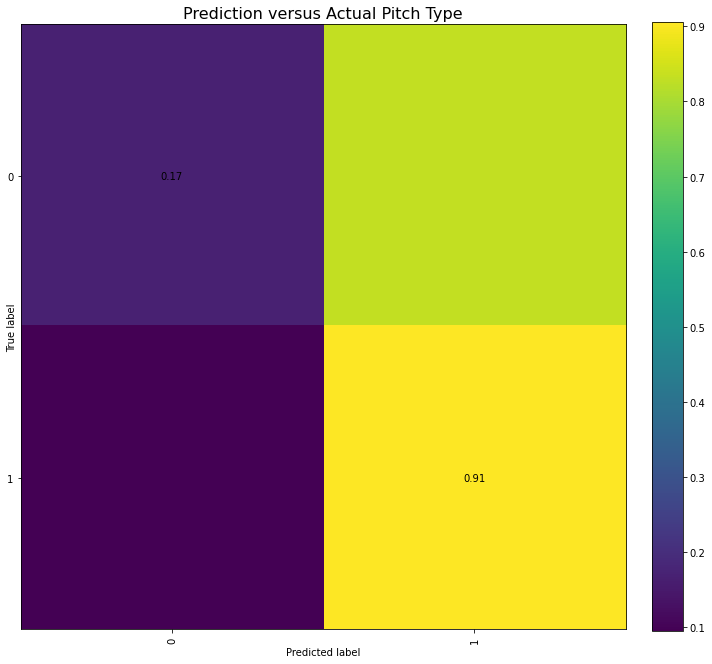

In [34]:
plt.figure(figsize=(10,12))
plot_confusion_matrix(cm_normalized, y_test,title='Prediction versus Actual Pitch Type')

# Appendix

## Testing for the OHE 3 categories: Breaking, offspeed, fastball

In [118]:
def dataPipeline(df):
    'Objective: Perform feature transformation, feature selection'
    'Input: Our entire dataset'
    'Output: X, our reduced feature matrix, and y our target vector'
    df = last_3_vel_type(df)
    df = count(df)
    df = score(df)
    df = baserunners(df)
    values_to_drop = ["IN", "UN", "SC", "PO", "FO", "EP", "AB"]
    df = df[~df["pitch_type"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag1"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag2"].isin(values_to_drop)]
    df = df[~df["pitch_type_lag3"].isin(values_to_drop)]
    columns_to_drop = ['game_pk', 'pitcher_id', 'final_balls', 'final_strikes', 'final_outs', 'start_tfs', 'start_tfs_zulu', 'batter_id', 'event', 'away_team_runs', 'home_team_runs', 'pitch_id', 'type', 'pitch_tfs', 'pitch_tfs_zulu', 'x', 'y', 'sv_id', 'start_speed', 'end_speed', 'break_angle', 'p_throws', 'created_at', 'added_at', 'modified_at', 'modified_by','uid','year','date','team_id_b', 'team_id_p','at_bat_des','event2','event3','event4','score','pitch_des','sz_top', 'sz_bot', 'pfx_x', 'pfx_z', 'px', 'pz', 'x0', 'z0', 'y0', 'vx0', 'vz0', 'vy0', 'ax', 'az', 'ay', 'break_length', 'break_y', 'type_confidence', 'zone', 'nasty', 'spin_dir', 'spin_rate', 'cc']
    df = df.drop(columns=columns_to_drop)
    df =df.dropna(subset=['pitch_type'])
    return df

In [119]:
df=dataPipeline(df)

In [120]:
import pandas as pd

def assign_pitch_group(pitch_type):
    if pitch_type in ["FF", "FA", "FC", "FT", "SI"]:
        return "Fastball"
    elif pitch_type in ["KC", "CU", "SL"]:
        return "Breaking Ball"
    else:
        return "Other"

df_pitches_three_groups=df.copy()
# create new column for pitch group
df_pitches_three_groups["pitch_group"] = df_pitches_three_groups["pitch_type"].apply(assign_pitch_group)

# one-hot encode pitch groups
df_pitches_encoded = pd.get_dummies(df_pitches_three_groups["pitch_group"])

# concatenate encoded pitch groups with original dataframe
df_pitches_final = pd.concat([df_pitches_three_groups, df_pitches_encoded], axis=1)
df=df_pitches_final.dropna()

In [121]:
df

,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,stand,b_height,pitch_type,on_1b,on_2b,on_3b,start_speed_lag1,start_speed_lag2,start_speed_lag3,pitch_type_lag1,pitch_type_lag2,pitch_type_lag3,pc_-1.0,pc_0.0,pc_1.0,run_diff,pitch_group,Breaking Ball,Fastball,Other
29,1,0,7,4,4,2,1,0,0,0,R,5-10,FF,0,0,0,90.0,90.9,87.2,FF,FF,FF,1,0,0,0,Fastball,0,1,0
30,1,0,7,5,5,2,2,1,0,0,R,5-10,FF,0,0,0,90.7,90.0,90.9,FF,FF,FF,0,1,0,0,Fastball,0,1,0
31,1,0,7,6,6,2,2,2,0,0,R,5-10,SL,0,0,0,92.9,90.7,90.0,FF,FF,FF,0,1,0,0,Breaking Ball,1,0,0
32,1,0,7,7,7,3,2,2,0,0,R,5-10,FF,0,0,0,79.9,92.9,90.7,SL,FF,FF,0,1,0,0,Fastball,0,1,0
33,1,0,7,8,8,3,2,3,0,0,R,5-10,FF,0,0,0,90.7,79.9,92.9,FF,SL,FF,0,1,0,0,Fastball,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718956,9,1,72,3,7,1,1,0,1,0,R,6-0,FF,0,0,0,97.6,96.6,96.7,FF,FF,FF,0,1,0,-4,Fastball,0,1,0
718957,9,1,72,4,8,1,2,1,1,0,R,6-0,FC,0,0,0,97.9,97.6,96.6,FF,FF,FF,0,0,1,-4,Fastball,0,1,0
718958,9,1,72,5,9,2,2,1,1,1,R,6-0,FF,0,0,0,91.4,97.9,97.6,FC,FF,FF,0,1,0,-4,Fastball,0,1,0
718959,9,1,73,1,10,0,0,0,2,0,L,6-3,FT,0,0,0,97.3,91.4,97.9,FF,FC,FF,0,1,0,-4,Fastball,0,1,0


## OHE the 3 group pitch_type_lag features

In [122]:
# Create a new dataframe with the three pitch type groups
df_pitches_three_groups = pd.DataFrame()

# One-hot encode the fastball pitches and add them to the new dataframe
fastballs = ['FF', 'FA', 'FC', 'FT', 'SI']
df_fastballs = pd.get_dummies(df['pitch_type_lag1'].isin(fastballs).astype(int).astype(str), prefix='fastball_lag1')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_fastballs], axis=1)

df_fastballs = pd.get_dummies(df['pitch_type_lag2'].isin(fastballs).astype(int).astype(str), prefix='fastball_lag2')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_fastballs], axis=1)

df_fastballs = pd.get_dummies(df['pitch_type_lag3'].isin(fastballs).astype(int).astype(str), prefix='fastball_lag3')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_fastballs], axis=1)

# One-hot encode the breaking ball pitches and add them to the new dataframe
breaking_balls = ["KC", "CU", "SL"]
df_breaking_balls = pd.get_dummies(df['pitch_type_lag1'].isin(breaking_balls).astype(int).astype(str), prefix='breaking_lag1')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_breaking_balls], axis=1)

df_breaking_balls = pd.get_dummies(df['pitch_type_lag2'].isin(breaking_balls).astype(int).astype(str), prefix='breaking_lag2')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_breaking_balls], axis=1)

df_breaking_balls = pd.get_dummies(df['pitch_type_lag3'].isin(breaking_balls).astype(int).astype(str), prefix='breaking_lag3')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_breaking_balls], axis=1)

# One-hot encode the offspeed pitches and add them to the new dataframe
offspeed = ['CH', 'FS', 'KN']
df_offspeed = pd.get_dummies(df['pitch_type_lag1'].isin(offspeed).astype(int).astype(str), prefix='offspeed_lag1')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_offspeed], axis=1)

df_offspeed = pd.get_dummies(df['pitch_type_lag2'].isin(offspeed).astype(int).astype(str), prefix='offspeed_lag2')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_offspeed], axis=1)

df_offspeed = pd.get_dummies(df['pitch_type_lag3'].isin(offspeed).astype(int).astype(str), prefix='offspeed_lag3')
df_pitches_three_groups = pd.concat([df_pitches_three_groups, df_offspeed], axis=1)

# Add the new columns to the original dataframe
df = pd.concat([df, df_pitches_three_groups], axis=1)


In [123]:
df

,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,stand,b_height,pitch_type,on_1b,on_2b,on_3b,start_speed_lag1,start_speed_lag2,start_speed_lag3,pitch_type_lag1,pitch_type_lag2,pitch_type_lag3,pc_-1.0,pc_0.0,pc_1.0,run_diff,pitch_group,Breaking Ball,Fastball,Other,fastball_lag1_0,fastball_lag1_1,fastball_lag2_0,fastball_lag2_1,fastball_lag3_0,fastball_lag3_1,breaking_lag1_0,breaking_lag1_1,breaking_lag2_0,breaking_lag2_1,breaking_lag3_0,breaking_lag3_1,offspeed_lag1_0,offspeed_lag1_1,offspeed_lag2_0,offspeed_lag2_1,offspeed_lag3_0,offspeed_lag3_1
29,1,0,7,4,4,2,1,0,0,0,R,5-10,FF,0,0,0,90.0,90.9,87.2,FF,FF,FF,1,0,0,0,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
30,1,0,7,5,5,2,2,1,0,0,R,5-10,FF,0,0,0,90.7,90.0,90.9,FF,FF,FF,0,1,0,0,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
31,1,0,7,6,6,2,2,2,0,0,R,5-10,SL,0,0,0,92.9,90.7,90.0,FF,FF,FF,0,1,0,0,Breaking Ball,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
32,1,0,7,7,7,3,2,2,0,0,R,5-10,FF,0,0,0,79.9,92.9,90.7,SL,FF,FF,0,1,0,0,Fastball,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
33,1,0,7,8,8,3,2,3,0,0,R,5-10,FF,0,0,0,90.7,79.9,92.9,FF,SL,FF,0,1,0,0,Fastball,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718956,9,1,72,3,7,1,1,0,1,0,R,6-0,FF,0,0,0,97.6,96.6,96.7,FF,FF,FF,0,1,0,-4,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
718957,9,1,72,4,8,1,2,1,1,0,R,6-0,FC,0,0,0,97.9,97.6,96.6,FF,FF,FF,0,0,1,-4,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
718958,9,1,72,5,9,2,2,1,1,1,R,6-0,FF,0,0,0,91.4,97.9,97.6,FC,FF,FF,0,1,0,-4,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
718959,9,1,73,1,10,0,0,0,2,0,L,6-3,FT,0,0,0,97.3,91.4,97.9,FF,FC,FF,0,1,0,-4,Fastball,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


## Modeling on the 3 categories

In [129]:
# Create a new target variable with three categories
df['pitch_type_cat'] = 'other'
df.loc[df['pitch_type'].isin(breaking_balls), 'pitch_type_cat'] = 'breaking_ball'
df.loc[df['pitch_type'].isin(fastballs), 'pitch_type_cat'] = 'fastball'

# Define the features and target variable
# Define the features and target variable
X = df[['inning', 'top', 'at_bat_num', 'pcount_at_bat', 'pcount_pitcher', 'on_1b', 'on_2b', 'on_3b', 'start_speed_lag1', 'start_speed_lag2', 'start_speed_lag3', 'pc_-1.0', 'pc_0.0', 'pc_1.0', 'run_diff', 'fastball_lag1_0', 'fastball_lag1_1', 'fastball_lag2_0', 'fastball_lag2_1', 'fastball_lag3_0', 'fastball_lag3_1', 'breaking_lag1_0', 'breaking_lag1_1', 'breaking_lag2_0', 'breaking_lag2_1', 'breaking_lag3_0', 'breaking_lag3_1', 'offspeed_lag1_0', 'offspeed_lag1_1', 'offspeed_lag2_0', 'offspeed_lag2_1', 'offspeed_lag3_0', 'offspeed_lag3_1']]
y = df['pitch_type_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))


C:\Users\Eric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy: 0.6298139919102148
Classification report:
               precision    recall  f1-score   support

breaking_ball       0.43      0.06      0.11     34553
     fastball       0.64      0.97      0.77     88636
        other       0.71      0.01      0.03     17235

     accuracy                           0.63    140424
    macro avg       0.59      0.35      0.30    140424
 weighted avg       0.59      0.63      0.52    140424



## Regular OHE with no altering

In [ ]:
# One hot encode pitch_type column
pitch_type_one_hot = pd.get_dummies(df_modeling['pitch_type'], prefix='pitch_type')

# Concatenate one hot encoded pitch_type with original DataFrame
df_modeling = pd.concat([df_modeling, pitch_type_one_hot], axis=1)